<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/HOA_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Cu, Angelo Luis C.
**Section** | CPE31S3
**Date Performed**: | 9/4/2024
**Date Submitted**: | 9/5/2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

## 1. Objectives

This activity aims to:
* Perform regression analysis using linear regression and polynomial regression; and
* Solve classification problem using logistic regression.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Demonstrate how to use Python to predic outcome using linear and polynomial regression;
* Demonstrate how to use single and multiple features to predict the outcome using linear regression;
* Demonstrate how to train and predict classification model using logistic regression;
* Evaluate and visualize the performance of different regression models.

## 3. Procedures and Outputs

### 3.1 Setup

These are configurations for running on your local machine. No problem with running it on your colab. This project requires Python 3.7 or above:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/training_linear_models` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 3.2 Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* or the *intercept term*.

#### 3.2.1 The Normal Equation

In [ ]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

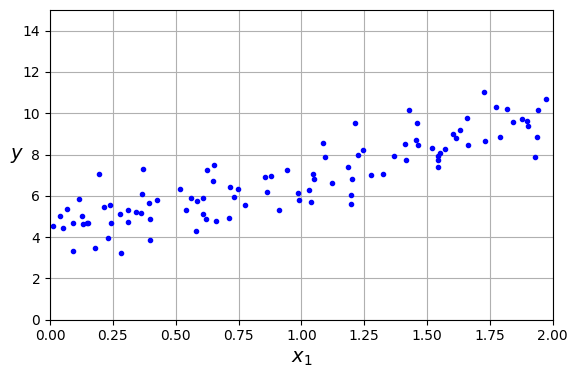

In [ ]:
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

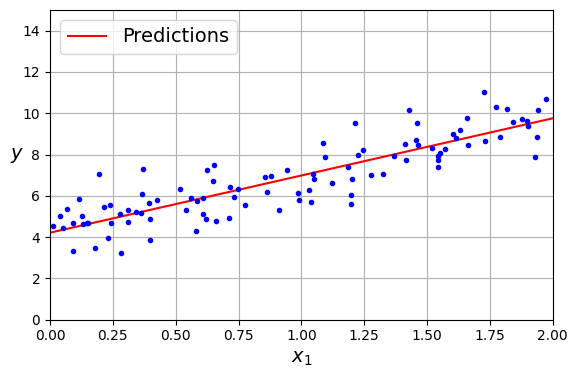

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

The pseudoinverse is computed using a standard matrix factorization technique called *Singular Value Decomposition*. What does SVD do? Quickly research and answer.

<font color="blue"> The singular value decomposition is a matrix operation where we separate (hence, decomposition) a matrix into three smaller matrices (U, Σ, VT). This is useful for getting the inverse of a matrix or at least the approximation of it when there are no or infinite solutions. </font>

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [ ]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

You have multiple methods used to implement the for linear regression. Provide a comparison between the *Singular Value Decomposition* and the Normal Equation Computation. Which is more efficient?

<font color="blue"> The Singular Value Decomposition is more efficient in terms of computational complexity, with the Normal Equation Computation is O(n^2.4) to O(n^3) compared to the Singular Value Decomposition (n^2) </font>

### 3.2 Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. Generally, the idea is to tweak parameters iteratively to minimize a cost funtion.

#### 3.2.1 Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost func tion with regards to each model parameter θj. In other words, you need to calculate
how much the cost function will change if you change θj
just a little bit. This is called a partial derivative. It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions).

In [ ]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

The trained model parameters:

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

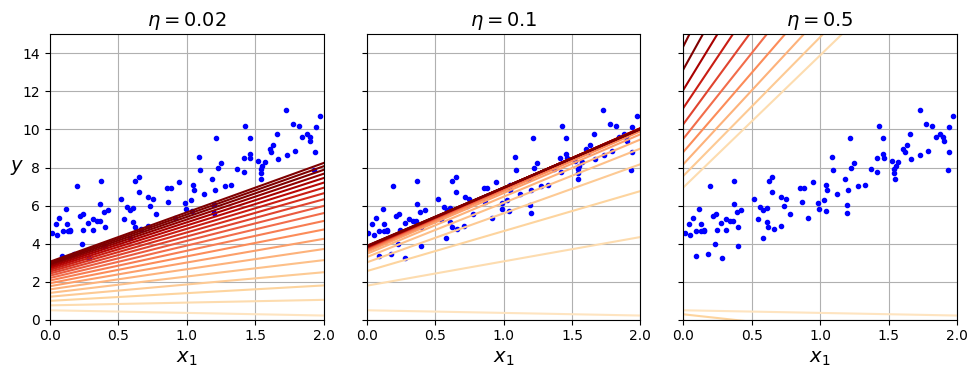

In [ ]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()

Compare the learning rate provided and shown in the graph above. Provide a quick discussion on how learning rate affects model learning based on the given figure.

<font color="blue"> The lines seen on the graph is the amount of steps taken. With a low learning rate (as shown on the left), the algorithm would reach the solution but it would take too many steps, which would take more time. With a higher learning rate (as shown on the right), the steps taken would be too large, hence it would not reach the solution. Finally, the middle graph has the balance of number of steps taken while being able to actually find the solution. </font>

#### 3.2.2 Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.)

In [ ]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

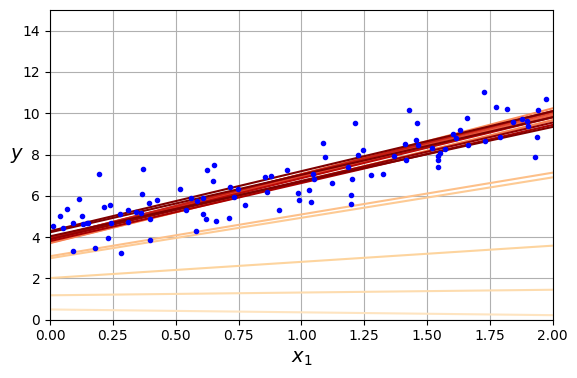

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

Compare the Stochastic Gradient Descent used in this section to the gradient descent algorithm used previously. What are the benefits to using Stochastic Gradient Descent (SGD)?

<font color="blue"> SGD is useful for larger datasets, as the batch gradient descent would use the entire dataset compared to SGD where it would only pick randomly which minimizes the amount of data used. </font>

#### 3.2.3 Mini-batch gradient descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

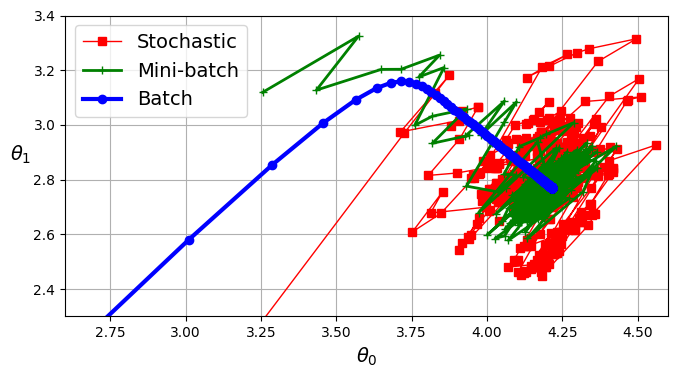

In [ ]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
save_fig("gradient_descent_paths_plot")
plt.show()

Provide a comparison of the 3 gradient descent algorithms included in this section. The comparison must provide an analysis based on different factors such as execution time (among others).

<font color="blue"> As seen in the graph, the batch gradient descent algorithm is the most useful for getting to the desired function and it is more linear compared to the others, however it takes longer. Stochastic gradient descent on the other hand would get to the desired function faster but it also looks the messiest in the graph. This is similar to the mini-batch gradient descent but it gets there closer. </font>

### 3.3 Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

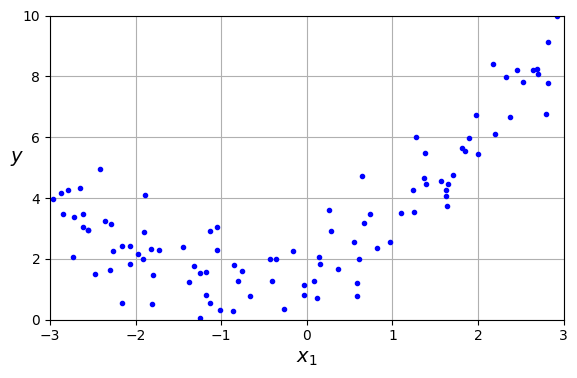

In [ ]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

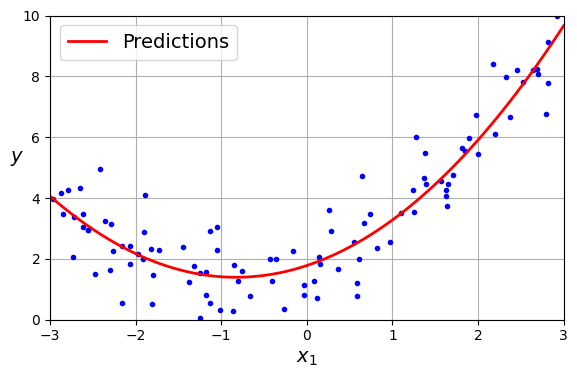

In [ ]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

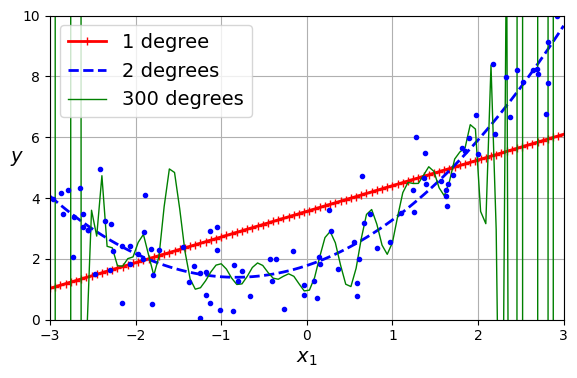

In [ ]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

Based on this example, how is Polynomial Regression able to find relationships between features? Is this something simple Linear Regression is unable to do?

<font color="blue"> Polynomial regression is able to find relationships by adding an nth degree as a new feature and running linear regression on the new feature. However, polynomial regression also adds the combination of n degrees of features, which a simple linear regression cannot do</font>

What do we achieve in the figure above? Explain the result of the comparison.

<font color="blue"> The figure above shows different types of lines being fitted, with the degree of 1 being a simple linear regression, and 2 degrees being a curve instead of a line, which is the most ideal of them. However, the line with 300 degrees is an example of overfitting where it tries to fit all the data too much </font>

### 3.4 Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression.

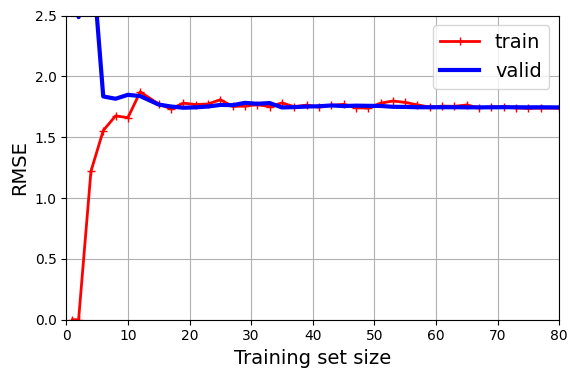

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")

plt.show()

This deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit
them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.


Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

What are these learning curves indicating? Is the model overfitting or underfitting? Explain why.

<font color="blue"> The learning curve indicates that there is an underfitting of data as the plateau (error) is high (around 1.75)</font>

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

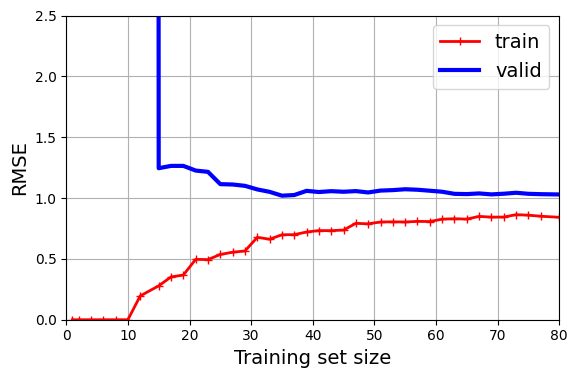

In [ ]:
# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

Compare this learning curve with the one previously shown above. The major differences you must explain here are as follows:

* The learning rate
* The gap between the curves

<font color="blue"> The learning rate is slower compared to the one above, and there is also a more noticeable gap compared to the graph shown before. However, the error is also noticeably lower (around 1) </font>

### 3.5 Regularized Linear Models

a good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

#### 3.5.1 Ridge Regression

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

Let's generate a very small and noisy linear dataset:

In [ ]:
# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

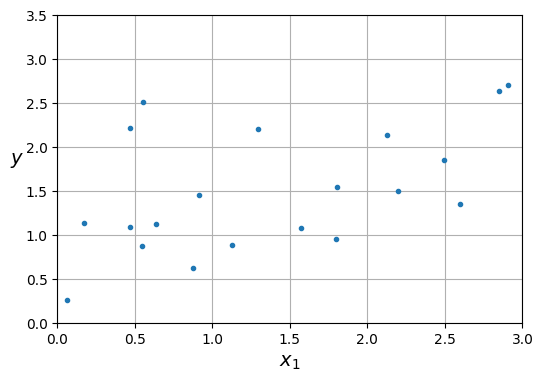

In [ ]:
# extra code – a quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same.

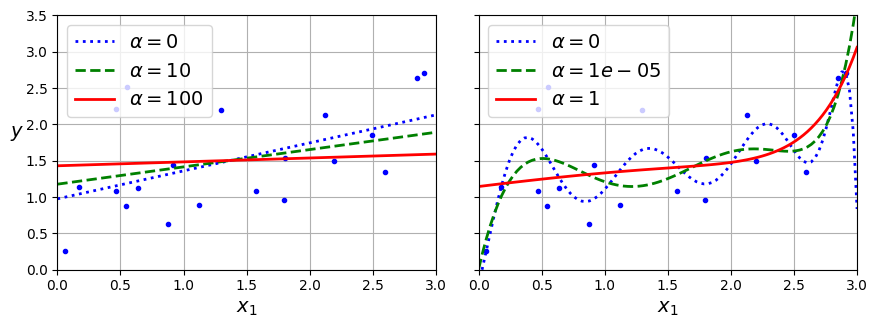

In [ ]:
# extra code – this cell generates and saves Figure 4–17

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [ ]:
# extra code – show that we get roughly the same solution as earlier when
#              we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

In [ ]:
# extra code – shows the closed form solution of Ridge regression,
#              compare with the next Ridge model's learned parameters below
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [ ]:
ridge_reg.intercept_, ridge_reg.coef_  # extra code

(array([0.97896386]), array([[0.38286422]]))

Discuss the following:
* What is the purpose of the hyperparameter alpha as seen in the figures above?
* Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

<font color="blue"> Alpha is the amount how much you want to constrain the weights of the data, with an alpha of 0 meaning no constraining and a high alpha meaning a high constraint which would cause the values to be so close to 0 it becomes a flat line.

A high training and validation error suggests that the model suffers from high bias, and therefore alpha should be decreased to try to fit the data more </font>

#### 3.5.2 Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero).

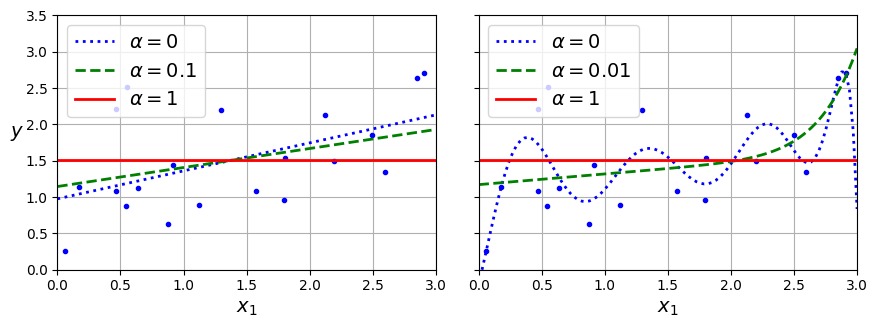

In [ ]:
# extra code – this cell generates and saves Figure 4–18
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression_plot")
plt.show()

For example, the dashed line in the right plot on Figure 4-18 (with α = 10-7) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

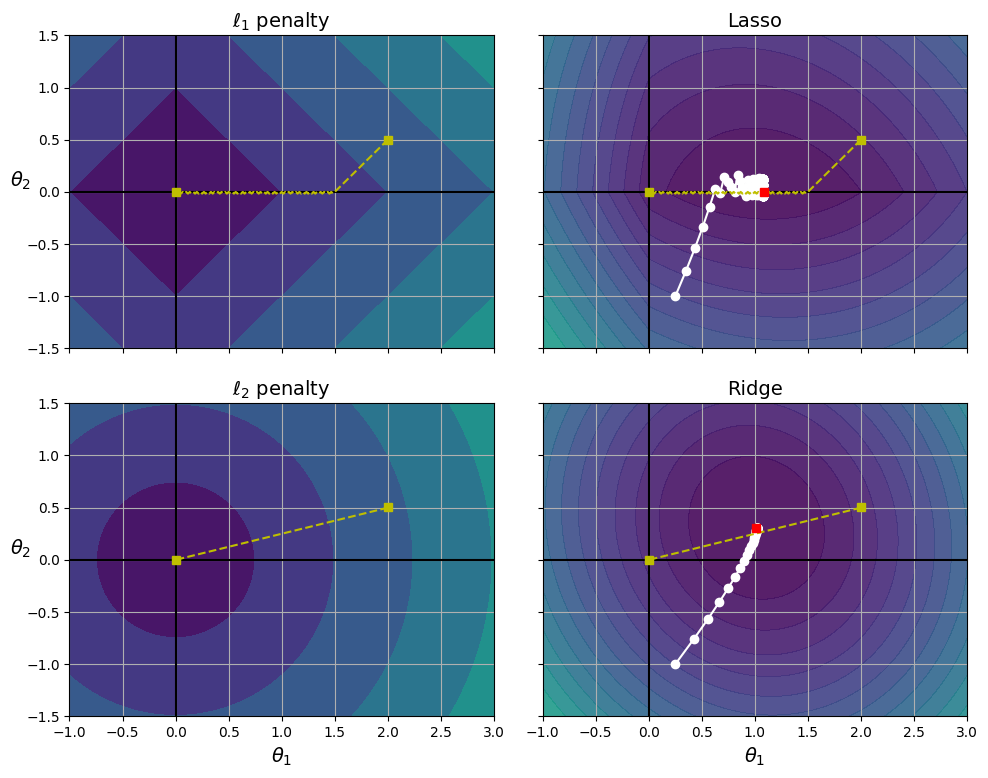

In [ ]:
# extra code – this BIG cell generates and saves Figure 4–19

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("lasso_vs_ridge_plot")
plt.show()

Using the figure above, compare the Lasso Regression and the Ridge Regression. What kind of performance is observable from the graph?

<font color="blue"> Ridge regression would slowly get to the desired point compared to the lasso regression, where it would be at 0 for a while until theta1 is at 1.5 where it would abruptly reach the desired point </font>

### 3.6 Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.

Let's go back to the quadratic dataset we used earlier:

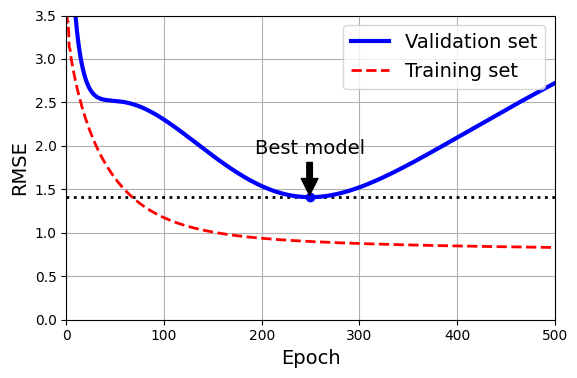

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()

Do you foresee any useful benefits of implementing early stopping?

<font color="blue"> Early stopping is useful in saving future computational power as it stops computing as soon as it finds a model that is minimal for some time </font>

### 3.7 Logistic Regression

Logistic Regression (also called Logit Regression) is com‐
monly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

#### 3.7.1 Estimating Probabilities

So how does it work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

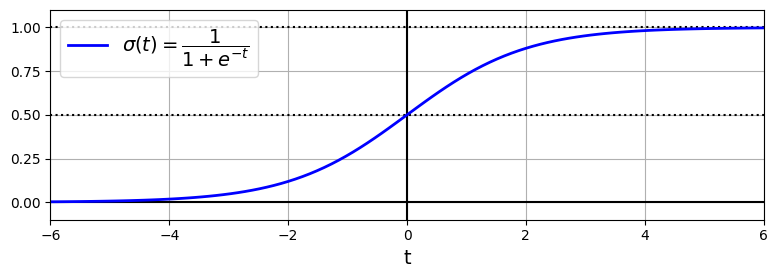

In [ ]:
# extra code – generates and saves Figure 4–21

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

Given the figure above, explain how the equation might be interpreted as the figure and how this provides a logistic regression prediction?

#### 3.7.2 Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR)  # extra code – it's a bit too long

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
iris.target.head(3)  # note that the instances are not shuffled

,target
0,0
1,0
2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

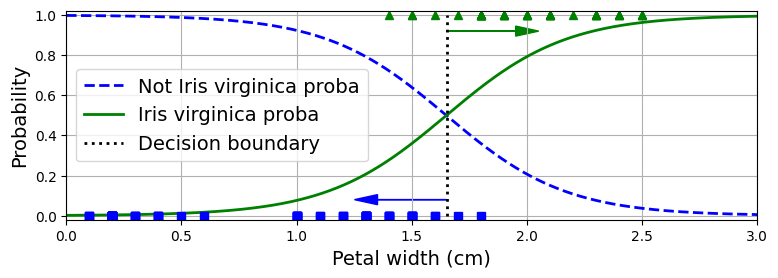

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [ ]:
decision_boundary

1.6516516516516517

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

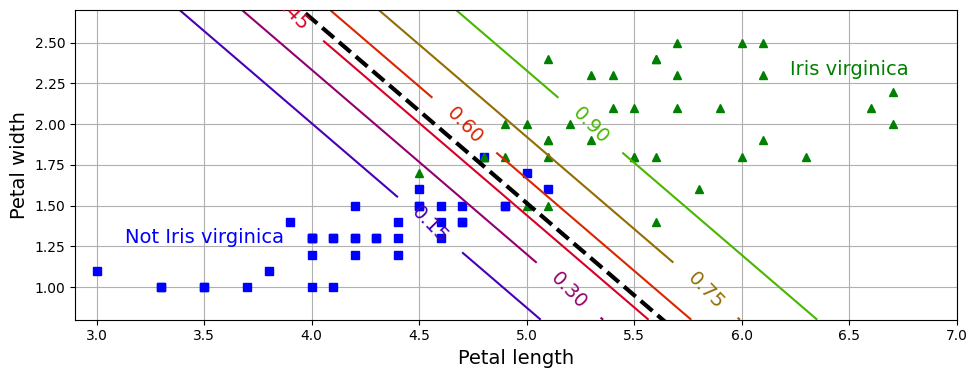

In [ ]:
# extra code – this cell generates and saves Figure 4–24

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

Given the above code and the figure provided, how do l1 and l2 penalties apply to the Logistic regression model?

<font color="blue"> l1 and l2 penalties are used to determine what features are more useful creating the line separating the two probabilities. This is also useful in preventing overfitting as mentioned with l2 penalty.</font>

#### 3.7.3 Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

The idea is quite simple: when given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each
class by applying the somax function (also called the normalized exponential) to the scores. The equation to compute sk(x) should look familiar, as it is just like the equation for Linear Regression prediction

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

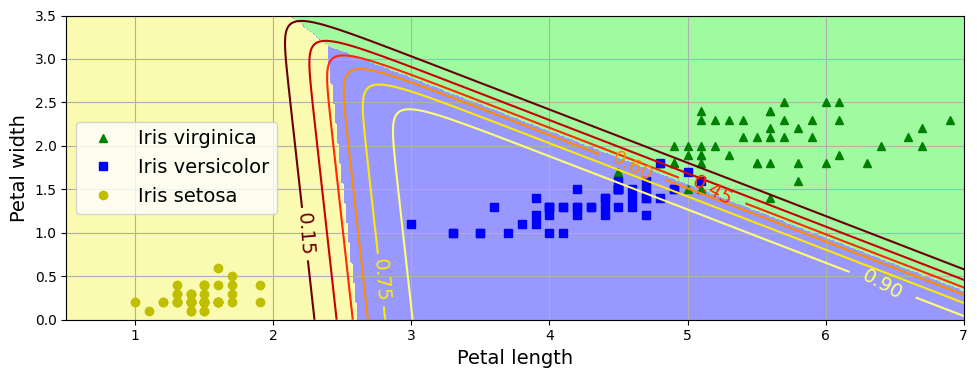

In [ ]:
# extra code – this cell generates and saves Figure 4–25

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()

Given the code above as an example, how many classes can the Softmax Regression predict? Can it be used to on non-mutually exclusive classes (such as to recognize different faces in a picture)?

<font color="blue"> In the code above, softmax regression is used to predict 3 classes. However, it cannot be used on non-mutually exclusive classes since it assigns a probability that a certain datapoint is a certain class, not multiple classes. </font>

## 4. Supplementary Activity

#### 4.1 Linear Regression

* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compute the correlation
* Use One-hot encoding in categorical features
* Apply feature scaling
* Perform linear regression using one independent variable only using numpy
* Perform linear regression using multiple independent variable using statsmodel
* Perform linear regression using sklearn



In [ ]:
import pandas as pd

# Dataset taken from https://www.kaggle.com/datasets/joebeachcapital/large-scale-wave-energy-farm
df = pd.read_csv('/content/WEC_Perth_49.csv')
df

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,100.0,250.0,250.00,250.00,300.00,200.00,400.00,100.00,900.0,150.0,...,100382.68,90042.10,99539.28,100219.37,70180.74,98693.05,100739.06,100530.96,0.86,4048188.53
36039,250.0,200.0,500.00,150.00,350.00,200.00,700.00,500.00,50.0,250.0,...,97576.89,89874.39,99413.89,83966.40,74140.17,66977.16,99768.78,92788.85,0.85,4033017.16
36040,200.0,100.0,400.00,100.00,350.00,500.00,750.00,200.00,700.0,250.0,...,101072.75,98181.96,77322.16,77632.27,102878.91,83002.93,91852.61,98283.28,0.86,4048053.62
36041,500.0,250.0,350.00,350.00,1000.00,250.00,550.00,150.00,800.0,0.0,...,99078.22,101120.28,73597.78,102042.99,58438.65,98804.39,66383.44,97423.85,0.86,4062515.64


In [ ]:
df.info()
# There are 36043*149 datapoints, 148 features and 1 target variable, all of which are float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 41.0 MB


In [ ]:
# As it is difficult to work with 148 features,
# I decided to only get 20 features by the highest correlation
print(df.corr().abs().nlargest(21, 'Total_Power').index)

Index(['Total_Power', 'qW', 'Y46', 'Y45', 'Power2', 'Power8', 'Power39',
       'Power1', 'Power40', 'X1', 'Y4', 'Power47', 'Power38', 'X49', 'Power18',
       'X8', 'Power17', 'Y47', 'Power15', 'Power46', 'Power43'],
      dtype='object')


In [ ]:
df = df.filter(items=['Total_Power', 'qW', 'Y46', 'Y45', 'Power2', 'Power8', 'Power39',
       'Power1', 'Power40', 'X1', 'Y4', 'Power47', 'Power38', 'X49', 'Power18',
       'X8', 'Power17', 'Y47', 'Power15', 'Power46', 'Power43'])
df

,Total_Power,qW,Y46,Y45,Power2,Power8,Power39,Power1,Power40,X1,...,Power47,Power38,X49,Power18,X8,Power17,Y47,Power15,Power46,Power43
0,4102461.43,0.87,837.50,800.0,77995.25,72878.46,101599.89,71265.25,99552.24,600.0,...,100915.03,101500.92,0.0,61966.02,800.0,59176.83,874.88,101433.80,101624.58,98844.30
1,4103361.41,0.87,837.50,800.0,76893.17,72970.56,101557.24,72871.68,99569.69,593.0,...,100934.53,101566.70,0.0,61220.26,800.0,58221.09,874.88,101586.31,101629.01,98759.79
2,4103680.44,0.87,837.50,800.0,76995.80,72987.39,101533.50,72724.29,99595.29,593.0,...,100941.00,101582.13,0.0,61229.45,800.0,58205.40,874.88,101597.84,101618.32,98746.68
3,4105661.06,0.87,837.50,800.0,77036.33,73220.73,101538.14,72759.25,99574.88,593.0,...,100943.59,101616.64,0.0,61468.66,800.0,58494.78,874.88,101629.75,101632.28,98760.96
4,3752648.77,0.79,837.53,800.0,45945.24,53794.42,101303.05,44620.44,99115.92,200.0,...,100948.38,101723.82,0.0,55400.66,232.4,54111.38,874.93,99587.02,101064.48,98630.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,4048188.53,0.86,650.00,650.0,58241.57,61760.38,91794.36,65741.01,98318.07,100.0,...,98693.05,101757.19,900.0,73684.33,150.0,68846.11,150.00,73678.76,70180.74,90042.10
36039,4033017.16,0.85,650.00,800.0,81720.09,79526.26,73320.88,57417.56,84845.23,250.0,...,66977.16,67315.27,450.0,67652.45,500.0,67439.61,350.00,78075.55,74140.17,89874.39
36040,4048053.62,0.86,850.00,700.0,56046.05,53703.83,59525.27,56802.67,100480.06,200.0,...,83002.93,59587.17,650.0,78974.69,300.0,61316.03,600.00,102036.26,102878.91,98181.96
36041,4062515.64,0.86,850.00,750.0,72971.37,73047.79,91797.78,74109.37,79720.83,500.0,...,98804.39,79011.77,250.0,102906.97,400.0,70509.61,700.00,73236.37,58438.65,101120.28


In [ ]:
# Checks for duplicated values
df[df.duplicated()].shape[0]

25273

In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)
df

,Total_Power,qW,Y46,Y45,Power2,Power8,Power39,Power1,Power40,X1,...,Power47,Power38,X49,Power18,X8,Power17,Y47,Power15,Power46,Power43
0,4102461.43,0.87,837.50,800.0,77995.25,72878.46,101599.89,71265.25,99552.24,600.0,...,100915.03,101500.92,0.0,61966.02,800.0,59176.83,874.88,101433.80,101624.58,98844.30
1,4103361.41,0.87,837.50,800.0,76893.17,72970.56,101557.24,72871.68,99569.69,593.0,...,100934.53,101566.70,0.0,61220.26,800.0,58221.09,874.88,101586.31,101629.01,98759.79
2,4103680.44,0.87,837.50,800.0,76995.80,72987.39,101533.50,72724.29,99595.29,593.0,...,100941.00,101582.13,0.0,61229.45,800.0,58205.40,874.88,101597.84,101618.32,98746.68
3,4105661.06,0.87,837.50,800.0,77036.33,73220.73,101538.14,72759.25,99574.88,593.0,...,100943.59,101616.64,0.0,61468.66,800.0,58494.78,874.88,101629.75,101632.28,98760.96
4,3752648.77,0.79,837.53,800.0,45945.24,53794.42,101303.05,44620.44,99115.92,200.0,...,100948.38,101723.82,0.0,55400.66,232.4,54111.38,874.93,99587.02,101064.48,98630.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10765,4048188.53,0.86,650.00,650.0,58241.57,61760.38,91794.36,65741.01,98318.07,100.0,...,98693.05,101757.19,900.0,73684.33,150.0,68846.11,150.00,73678.76,70180.74,90042.10
10766,4033017.16,0.85,650.00,800.0,81720.09,79526.26,73320.88,57417.56,84845.23,250.0,...,66977.16,67315.27,450.0,67652.45,500.0,67439.61,350.00,78075.55,74140.17,89874.39
10767,4048053.62,0.86,850.00,700.0,56046.05,53703.83,59525.27,56802.67,100480.06,200.0,...,83002.93,59587.17,650.0,78974.69,300.0,61316.03,600.00,102036.26,102878.91,98181.96
10768,4062515.64,0.86,850.00,750.0,72971.37,73047.79,91797.78,74109.37,79720.83,500.0,...,98804.39,79011.77,250.0,102906.97,400.0,70509.61,700.00,73236.37,58438.65,101120.28


In [ ]:
# Checks for missing values
print(df.isnull().sum())

Total_Power    0
qW             0
Y46            0
Y45            0
Power2         0
Power8         0
Power39        0
Power1         0
Power40        0
X1             0
Y4             0
Power47        0
Power38        0
X49            0
Power18        0
X8             0
Power17        0
Y47            0
Power15        0
Power46        0
Power43        0
dtype: int64


In [ ]:
# Perform descriptive statistics such as mean, median and mode
df.describe()

,Total_Power,qW,Y46,Y45,Power2,Power8,Power39,Power1,Power40,X1,...,Power47,Power38,X49,Power18,X8,Power17,Y47,Power15,Power46,Power43
count,1.077000e+04,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000,...,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000,10770.000000
mean,3.893884e+06,0.824593,884.424927,858.984349,61145.754325,66793.535926,92479.648341,58929.162072,92586.685738,378.914094,...,98500.876578,90209.895611,327.779175,73694.334773,482.967537,72988.134533,906.194843,70778.571148,98804.392495,96811.584648
std,1.251030e+05,0.026766,66.196586,75.287792,11880.054767,14291.491481,9379.231289,11804.823387,9488.115891,285.422869,...,4309.276635,9334.146799,402.195539,13123.595002,325.570251,14312.191409,63.713721,12629.455593,4977.962121,7012.913810
min,3.388944e+06,0.720000,154.820000,0.000000,37369.630000,40806.620000,51439.160000,36990.800000,60465.230000,0.000000,...,63028.260000,51154.360000,0.000000,44523.530000,0.000000,43083.300000,0.000000,43625.780000,55401.380000,56391.970000
25%,3.808487e+06,0.810000,837.520000,800.000000,52626.025000,56301.215000,83591.562500,51405.745000,85894.980000,200.000000,...,97614.535000,84539.450000,0.000000,63768.667500,232.220000,62284.820000,874.900000,61162.940000,97937.817500,96403.252500
50%,3.894068e+06,0.820000,837.900000,800.000000,58423.295000,63526.870000,97588.380000,55671.055000,98232.485000,350.000000,...,100785.760000,88996.995000,0.000000,70493.975000,432.750000,69075.750000,875.060000,68256.020000,101172.045000,98748.075000
75%,3.981475e+06,0.840000,950.000000,933.537500,66572.355000,73381.417500,99656.602500,63170.232500,100394.590000,600.000000,...,100961.825000,99727.582500,800.000000,81252.130000,800.000000,83814.445000,950.000000,77214.867500,101390.782500,100941.215000
max,4.177659e+06,0.880000,1000.000000,1000.000000,103642.360000,102698.540000,105998.050000,103141.370000,107867.630000,1000.000000,...,102892.110000,106292.350000,1000.000000,104329.580000,1000.000000,104371.990000,1000.000000,103150.330000,104751.350000,109400.430000


In [ ]:
df.median()

,0
Total_Power,3894068.150
qW,0.820
Y46,837.900
Y45,800.000
Power2,58423.295
Power8,63526.870
Power39,97588.380
Power1,55671.055
Power40,98232.485
X1,350.000


In [ ]:
df.mode().T

,0
Total_Power,3905384.68
qW,0.82
Y46,950.00
Y45,800.00
Power2,62024.55
Power8,66516.48
Power39,83265.67
Power1,53504.74
Power40,90474.01
X1,200.00


<Axes: >

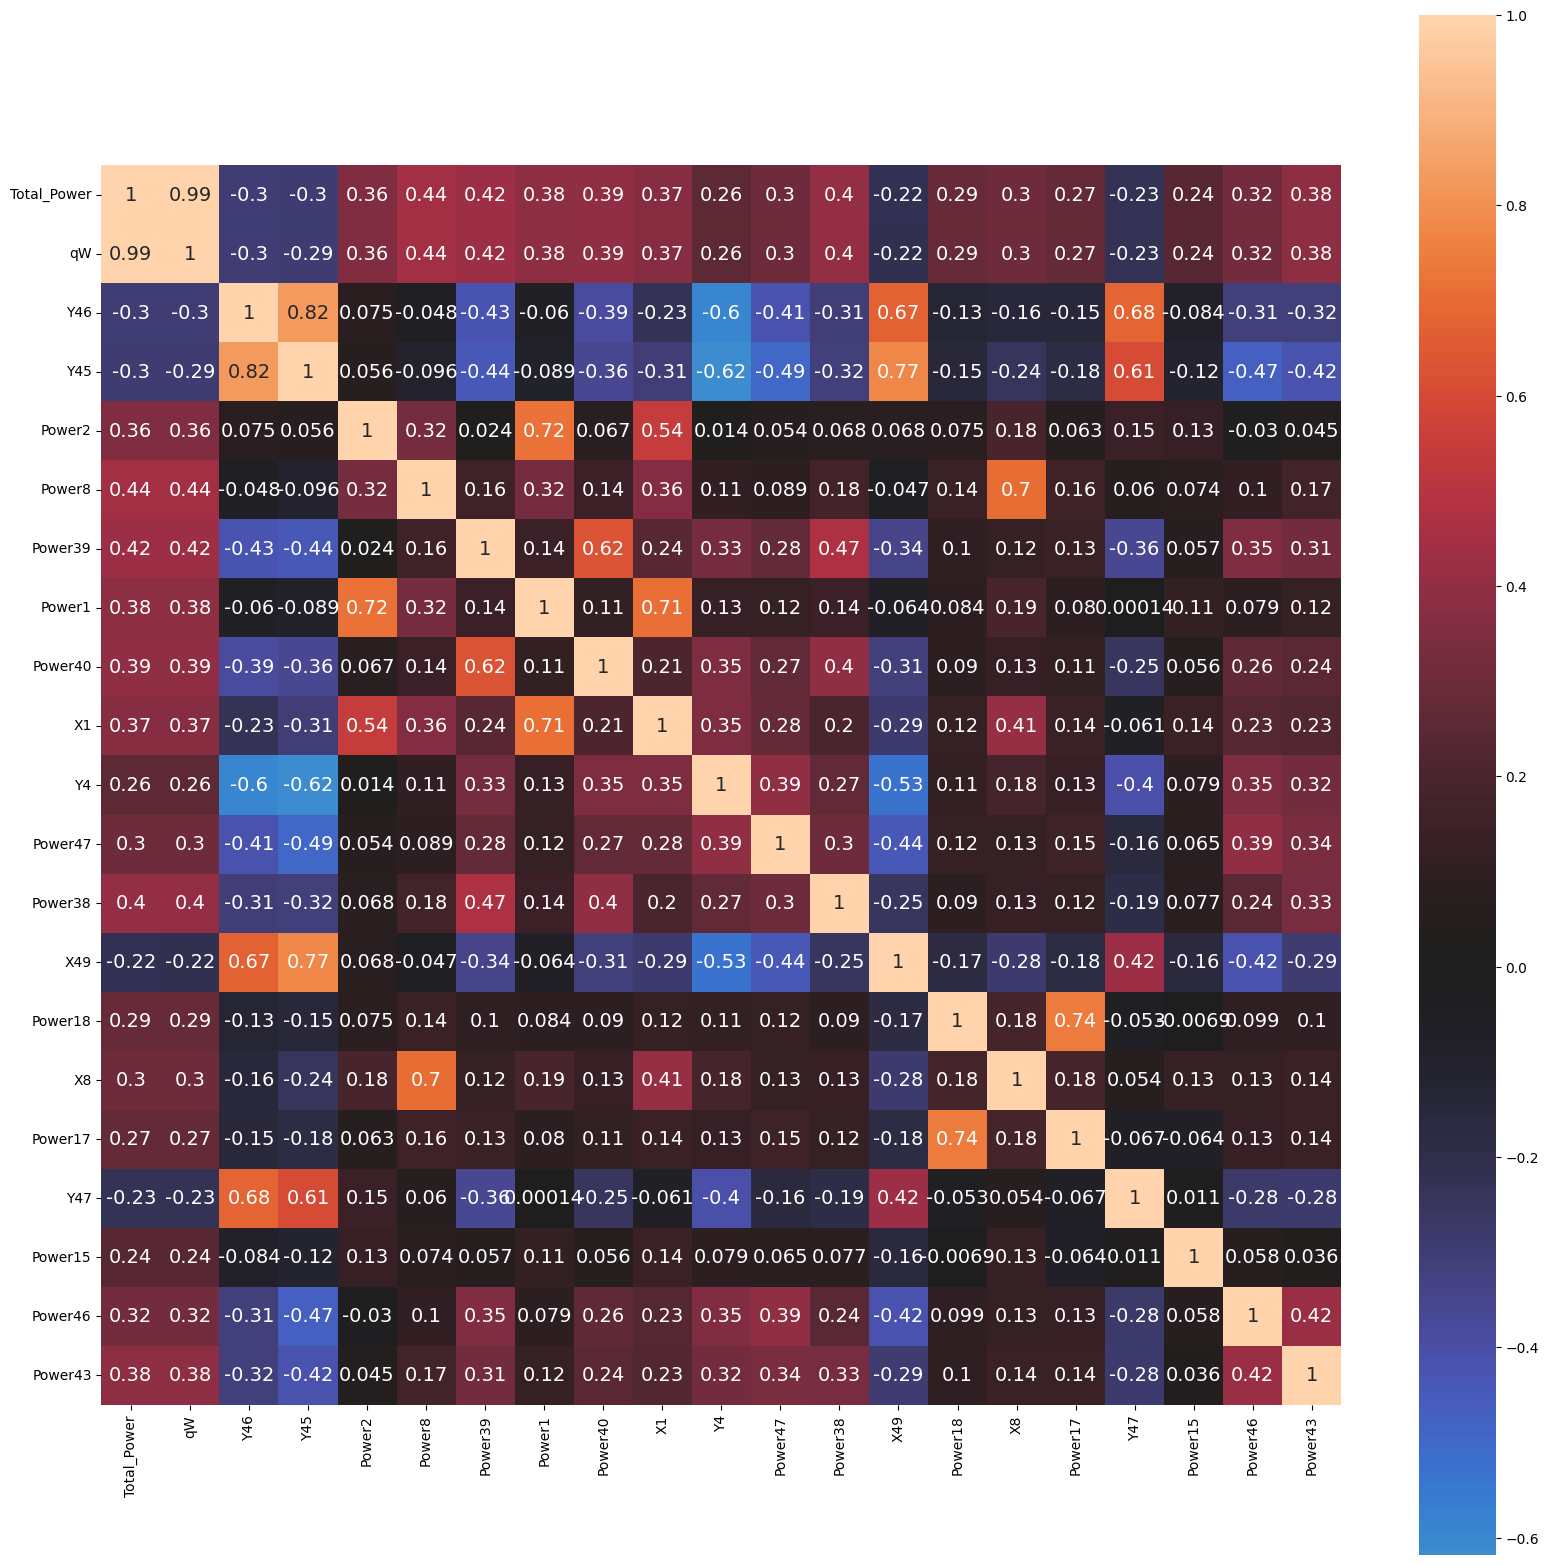

In [ ]:
import seaborn as sns

# Plots the correlations of each variable
plt.figure(figsize=(20,20))
sns.heatmap(
    df.sort_index().corr(),
    annot=True, center=0, square=True
)

In [ ]:
# Apply feature scaling
from sklearn.preprocessing import StandardScaler

x = df.values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled, columns=df.columns)
scaled_df

,Total_Power,qW,Y46,Y45,Power2,Power8,Power39,Power1,Power40,X1,...,Power47,Power38,X49,Power18,X8,Power17,Y47,Power15,Power46,Power43
0,1.667321,1.696493,-0.708905,-0.783488,1.418367,0.425792,0.972432,1.045053,0.734169,0.774627,...,0.560248,1.209703,-0.815013,-0.893723,0.973821,-0.965048,-0.491516,2.427393,0.566561,0.289867
1,1.674515,1.696493,-0.708905,-0.783488,1.325595,0.432237,0.967885,1.181141,0.736008,0.750101,...,0.564774,1.216751,-0.815013,-0.950552,0.973821,-1.031829,-0.491516,2.439469,0.567451,0.277815
2,1.677066,1.696493,-0.708905,-0.783488,1.334235,0.433415,0.965353,1.168655,0.738706,0.750101,...,0.566275,1.218404,-0.815013,-0.949851,0.973821,-1.032925,-0.491516,2.440382,0.565303,0.275946
3,1.692898,1.696493,-0.708905,-0.783488,1.337646,0.449743,0.965848,1.171617,0.736555,0.750101,...,0.566876,1.222101,-0.815013,-0.931623,0.973821,-1.012705,-0.491516,2.442909,0.568108,0.277982
4,-1.129005,-1.292482,-0.708452,-0.783488,-1.279558,-0.909613,0.940782,-1.212164,0.688181,-0.626868,...,0.567988,1.233585,-0.815013,-1.394018,-0.769662,-1.318990,-0.490731,2.281158,0.454040,0.259342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10765,1.233475,1.322871,-3.541509,-2.775935,-0.244470,-0.352195,-0.073068,0.577066,0.604087,-0.977241,...,0.044597,1.237160,1.422809,-0.000762,-1.022768,-0.289419,-11.869185,0.229648,-5.750341,-0.965333
10766,1.112199,0.949249,-3.541509,-0.783488,1.731919,0.890972,-2.042775,-0.128055,-0.815949,-0.451681,...,-7.315655,-2.452896,0.303898,-0.460405,0.052318,-0.387696,-8.729998,0.577801,-4.954913,-0.989249
10767,1.232397,1.322871,-0.520065,-2.111786,-0.429286,-0.915952,-3.513711,-0.180146,0.831961,-0.626868,...,-3.596582,-3.280873,0.801192,0.402375,-0.562017,-0.815574,-4.806014,2.475098,0.818549,0.195416
10768,1.348003,1.322871,-0.520065,-1.447637,0.995464,0.437641,-0.072703,1.285992,-1.356060,0.424253,...,0.070436,-1.199750,-0.193395,2.226066,-0.254849,-0.173184,-3.236421,0.194617,-8.109266,0.614423


In [ ]:
'''
 Perform linear regression using one independent variable only using numpy
'''
# Separate dataframe to one target and one feature
X = scaled_df['qW']
y = scaled_df['Total_Power']

# Since the dataset is large (with 10,000+ labels, I decided to use SVD for the linear regression)
X_b = np.c_[np.ones((10770, 1)), X] # Adds 1 to the feature
theta = np.linalg.pinv(X_b).dot(y) # Computes for theta using SVD
theta

array([1.99845565e-15, 9.93879416e-01])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Adds 1 to the feature
y_predict = X_new_b @ theta
y_predict

array([1.99845565e-15, 1.98775883e+00])

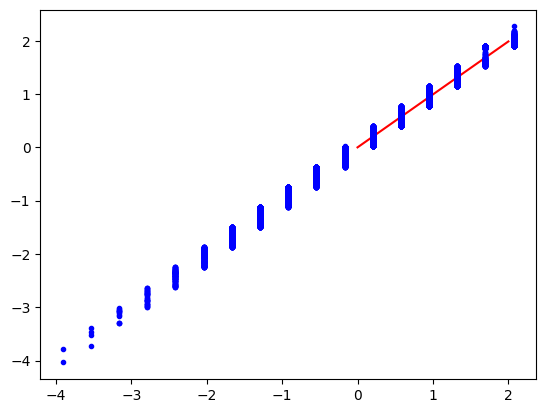

In [ ]:
# Comparing the test value with the predicted value
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

# It can be seen that the line follows the expected trend

In [ ]:
'''
  Perform linear regression using multiple independent variable using statsmodel
'''
import statsmodels.api as sm

X = scaled_df.drop(['Total_Power'], axis=1)
y = scaled_df['Total_Power']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Important statistic is the R-squared and adjusted R-squared, which is 0.988

                                 OLS Regression Results                                
Dep. Variable:            Total_Power   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          4.380e+04
Date:                Thu, 05 Sep 2024   Prob (F-statistic):                        0.00
Time:                        11:07:49   Log-Likelihood:                          8480.3
No. Observations:               10770   AIC:                                 -1.692e+04
Df Residuals:                   10750   BIC:                                 -1.678e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
'''
  Perform Linear Regression using sklearn
'''
from sklearn.linear_model import LinearRegression

# Splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Uses the model to predict new data (in this case, test)
y_pred = lin_reg.predict(X_test)

# Gets the R2 value
print('R-Squared: %.4f' % lin_reg.score(X_test,y_test))
# R2 value is 0.988, which is similar to the score given by statsmodel

R-Squared: 0.9880


In [ ]:
# Gets the 5-Fold Cross Validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train, y_train, cv=5).mean()
print('Cross-validation score: {:.4f}'.format(scores))
# The model only suffers a slight dip, which suggests the model is robust

Cross-validation score: 0.9877


Text(0.5, 0.98, 'Actual vs. Predicted Values')

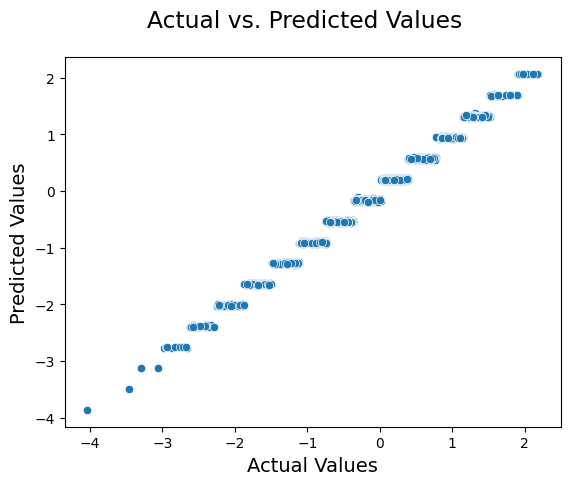

In [ ]:
# Comparing the test value with the predicted value
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs. Predicted Values')

#### 4.2 Polynomial Regression

* Choose your own dataset
* Import the dataset
* Perform polynomial regression using sklearn and polyfit
* Measure the performance for each polynomial degree.
* Plot the performance of the model for each polynomial degree.

In [ ]:
# Using the same dataset as with the Linear Regression
# Where I try to find out if a higher order polynomial would fit better
# Using sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

degrees = [1,2,3]
models = []

for degree in degrees:
  poly = PolynomialFeatures(degree=degree)
  lin_model = LinearRegression()
  model = make_pipeline(poly, lin_model)
  model.fit(X_train, y_train)
  print('R-Squared: %.4f' % model.score(X_test,y_test))
  models.append(model)

# It can be seen that by changing the order to squared and cubed,
# The R-squared drops off quickly

R-Squared: 0.9880
R-Squared: 0.9876
R-Squared: 0.1091


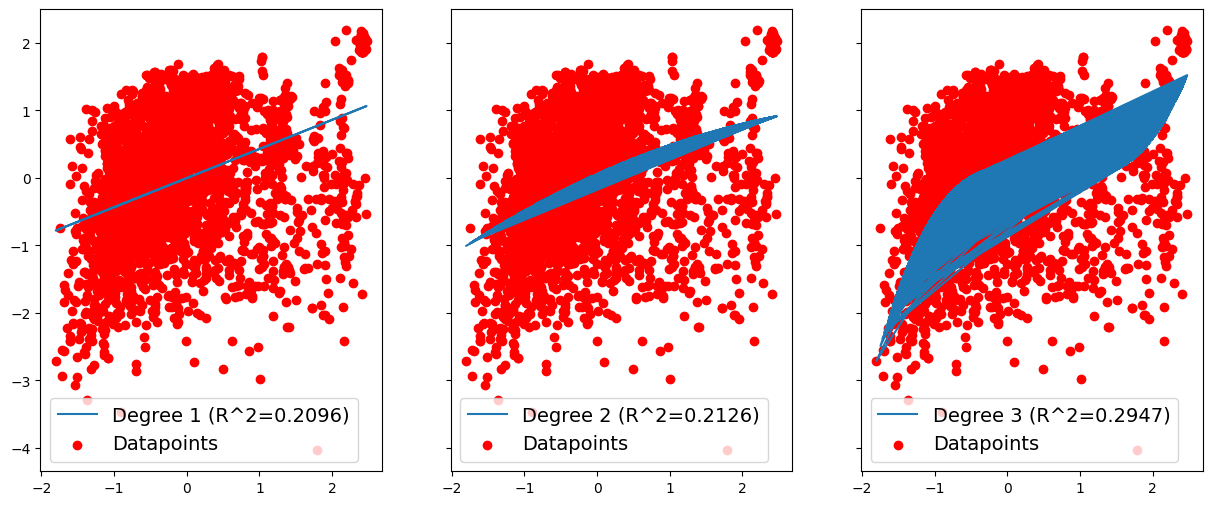

In [ ]:
# Using polyfit (https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
# It should be noted that the documentation also mentioned that np.polynomial is preferred

X_polyfit = scaled_df['Power8'] # gets the second highest feature by correlation

X_train, X_test, y_train, y_test = train_test_split(X_polyfit, y, test_size=0.3, random_state=0)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

for ax_ix, degree in enumerate(degrees):
  coef = np.polyfit(X_train, y_train, degree)
  y_pred = np.polyval(coef, X_test)
  y_mean = np.mean(y_test)
  TSS = np.sum((y_test - y_mean)**2)
  RSS = np.sum((y_test - y_pred)**2)
  r_squared = 1 - (RSS / TSS)
  ax[ax_ix].plot(X_test, y_pred, label="Degree {degree} (R^2={r_squared:.4f})".format(degree=degree, r_squared=r_squared))
  ax[ax_ix].scatter(X_test, y_test, label="Datapoints", color='red')
  ax[ax_ix].legend()

# It can be seen that the results are not good, with the R-squared being 0.2
# But it slightly improves with a higher degree

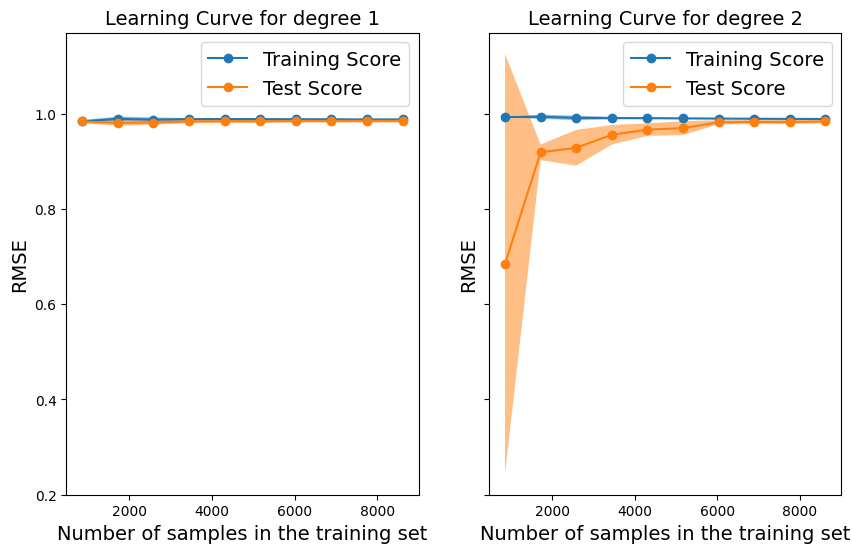

In [ ]:
# Plots the performance of each model
from sklearn.model_selection import LearningCurveDisplay

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": 5,
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "RMSE",
}

for ax_idx, model in enumerate(models[:2]):
  LearningCurveDisplay.from_estimator(model, **common_params, ax=ax[ax_idx])
  handles, label = ax[ax_idx].get_legend_handles_labels()
  ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
  ax[ax_idx].set_title("Learning Curve for degree " + str(ax_idx+1))

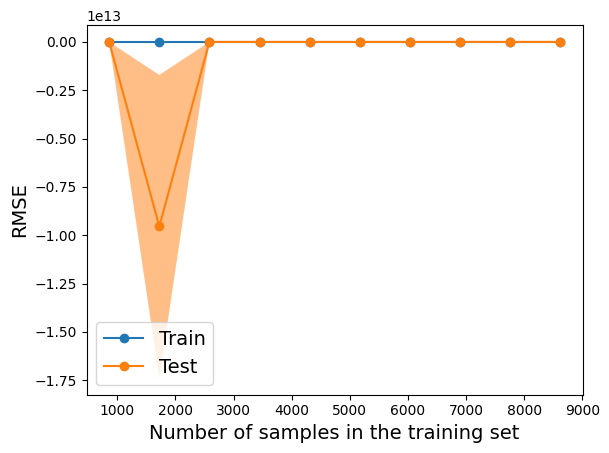

In [ ]:
LearningCurveDisplay.from_estimator(models[2], **common_params)
# For third degree, separated due to the computational time required to run (5 mins.)

#### 4.3 Logistic Regression

* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Solve classification problem using Logistic Regression
* Evaluate the model using classification report, accuracy and confusion matrix

In [ ]:
# The dataset that I have chosen is the Room Occupancy using IoT dataset
# Link: https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor
df = pd.read_csv('Occupancy.csv')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [ ]:
df.info()
# It can be seen that there are 6 features and 1 target columns
# with 1 feature being an object datatype, 5 features being float, and 1 target being int
# There are also 20,560 initial datapoints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# I decided to drop the date feature to simplify the processing
df.drop(['date'], axis=1, inplace=True)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


<Axes: >

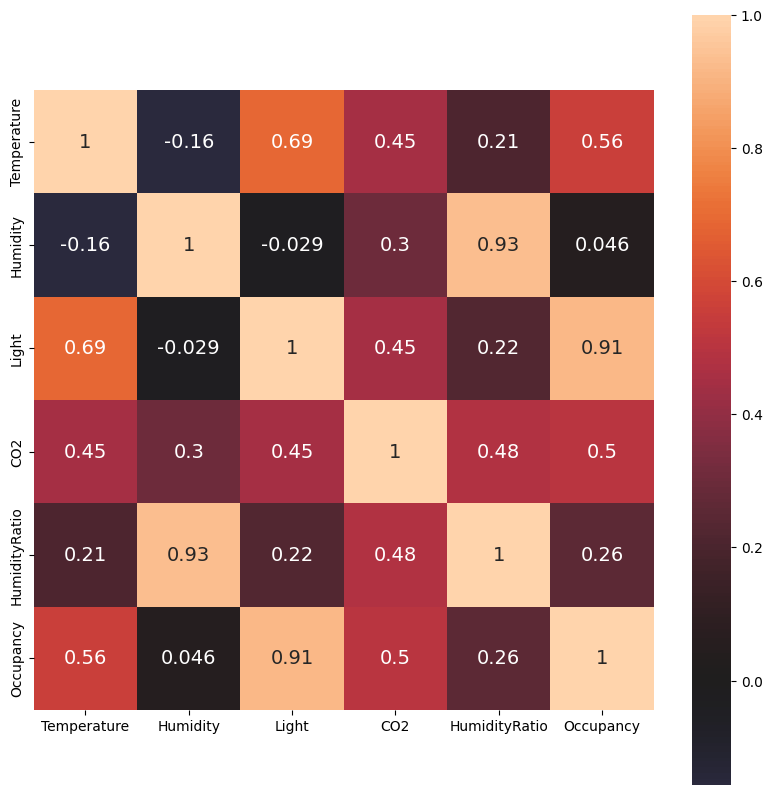

In [ ]:
# Plots the correlations of each variable
plt.figure(figsize=(10,10))
sns.heatmap(
    df.sort_index().corr(),
    annot=True, center=0, square=True
)
# It can be noticed the correlations between features and target are already high except the humidity,
# Therefore it might be better to drop the humidity feature for the model to be more accurate

In [ ]:
df.drop(['Humidity'], axis=1, inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Checks for duplicated values
df[df.duplicated()].shape[0]

1441

In [ ]:
# Removes duplicates
df.drop_duplicates(inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Perform descriptive statistics such as mean, median and mode
df.describe()

,Temperature,Light,CO2,HumidityRatio,Occupancy
count,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000
mean,20.964184,140.502353,703.073166,0.004244,0.248287
std,1.060804,215.011742,316.089682,0.000762,0.432030
min,19.000000,0.000000,412.750000,0.002674,0.000000
25%,20.267500,0.000000,466.000000,0.003734,0.000000
50%,20.790000,0.000000,574.000000,0.004300,0.000000
75%,21.650000,408.416667,824.000000,0.004836,0.000000
max,24.408333,1697.250000,2076.500000,0.006476,1.000000


In [ ]:
df.median()

,0
Temperature,20.7900
Light,0.0000
CO2,574.0000
HumidityRatio,0.0043
Occupancy,0.0000


In [ ]:
df.mode().T

,0
Temperature,20.390000
Light,0.000000
CO2,438.000000
HumidityRatio,0.003327
Occupancy,0.000000


In [ ]:
# Solve classification problem using Logistic Regression
X = df.drop(['Occupancy'], axis=1)
y = df['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate the model using classification report, accuracy and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Predicting result from test variables
y_pred_test = log_reg.predict(X_test)
# Creates a classification report
print(classification_report(y_test, y_pred_test))

# It can be noticed that the metrics are all high (almost 1.0)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4345
           1       0.96      1.00      0.98      1391

    accuracy                           0.99      5736
   macro avg       0.98      0.99      0.99      5736
weighted avg       0.99      0.99      0.99      5736



In [ ]:
# Gets the accuracy score
y_pred_train = log_reg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
# It can be seen that the metrics are also high (around 0.98)

Training-set accuracy score: 0.9883
Test-set accuracy score: 0.9890


In [ ]:
# Gets the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4286   59]
 [   4 1387]]


<Axes: >

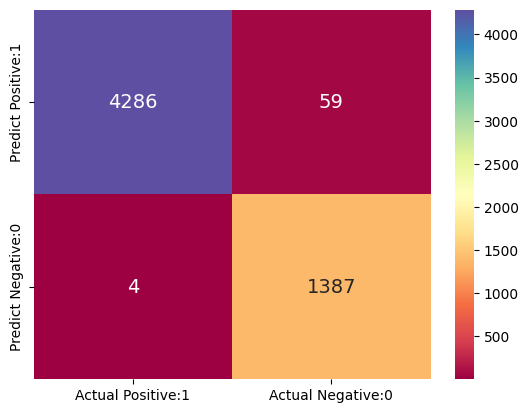

In [ ]:
# Visualizing the confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],
                         index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Spectral')

In [ ]:
# Gets the metrics available for confusion matrix
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Accuracy: {:.4f}\n'.format(accuracy))
misclassification = (FP + FN) / (TP + TN + FP + FN)
print('Misclassification Rate: {:.4f}\n'.format(misclassification))
recall = TP / (TP + FN)
print('True Positive Rate: {:.4f}\n'.format(recall))
false_positive = FP / (TN + FN)
print('False Positive Rate: {:.4f}\n'.format(false_positive))
true_negative = TN / (TN + FN)
print('True Negative Rate: {:.4f}\n'.format(true_negative))
true_positive = TP / (TP + FP)
print('Precision : {:.4f}\n'.format(true_positive))
prevalence = (TP + FN) / (TP + TN + FP + FN)
print('Prevalence: {:.4f}\n'.format(prevalence))

# It can be noticed that most of the metrics are either very high (accuracy, true negative)
# or very low (misclassification, false positive rate),
# which suggests an accurate model

Accuracy: 0.9890

Misclassification Rate: 0.0110

True Positive Rate: 0.9991

False Positive Rate: 0.0424

True Negative Rate: 0.9971

Precision : 0.9864

Prevalence: 0.7479



## 5. Summary, Conclusions and Lessons Learned

I have generally learned of linear, polynomial, and logistic regression; the underlying principles and other useful tools in ensuring that the models generated by these algorithms are not overfitting or underfitting. To conclude, I was able to learn how to use linear and polynomial regression for predicting future outcome which is continuous in nature, whereas logistic regression is useful in classifying a target variable into two or more classes.



<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*

***Disclaimer***

*Contents of this Notebook are based on Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow 3rd Edition by Aurelien Geron.*
*A copy of the complete text can be obtained here: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/*